# Developed notebook for synthetic test of multi-domain cross-correlation

In [2]:
# Import all required modules
import sys, time, scipy, numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [3]:
# Write the main path for using the codes folder
mypath = sys.path.append('/media/delimar/GEOMAG_4GB/Nelson/doc-ufpa/sources/')#/home/delimar/Documents/sources

**ABOUT THE CELL ABOVE, IF YOU WILL RUN IN ANOTHER ENVIRONMENT, PLEASE ADD YOUR MAIN PATH, OTHERWISE WILL NOT WORK!**

In [4]:
# Define number of points and data shape
nx, ny = 50, 50
shape = (nx, ny)

In [5]:
# Importing the grid creation module
from codes import grids

In [6]:
# Creating a regular grid
area = (-5000., 5000., -5000., 5000.)
xo, yo, zo = grids.regular_grid(area, shape, -150.)

In [7]:
# Define inclination and declination of the regional magnetic field
incf, decf, incs, decs = 5., 70., 0., 0.

In [8]:
# Define the dike models
dikemodel = [-500., 500., -2500., 2500., 200., 3000.]

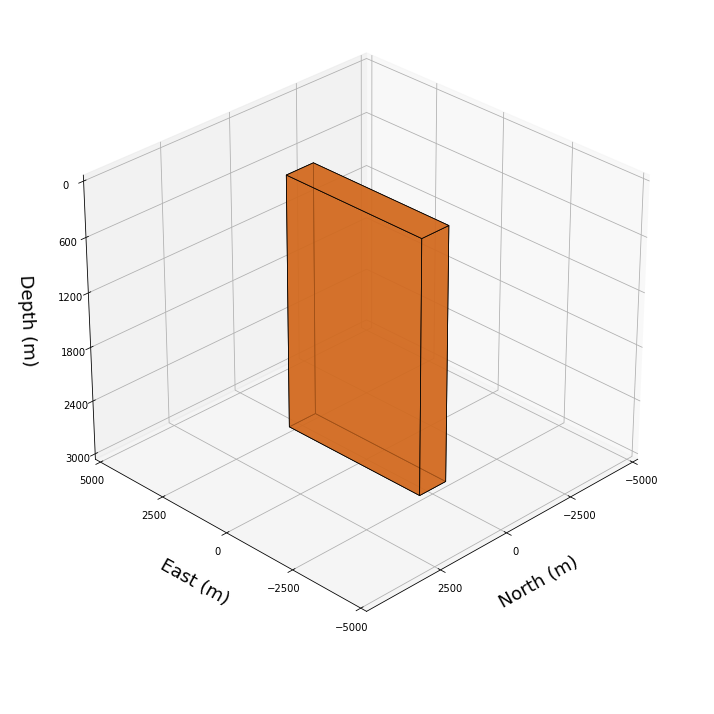

In [9]:
# Plot the main 3D source
figure = pyplot.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')
#ax.set_title('Vertical dike model', size = 18)

x1, x2, y1, y2, z1, z2 = dikemodel[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vert =  [[v[0],v[1],v[2],v[3]], 
         [v[0],v[1],v[5],v[4]], 
         [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], 
         [v[3],v[0],v[4],v[7]], 
         [v[4],v[5],v[6],v[7]]]

fig01 = Poly3DCollection(vert, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 18, labelpad = 20)
ax.set_ylabel('East (m)', size = 18, labelpad = 20)
ax.set_zlabel('Depth (m)', size = 18, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(0., z2)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2500))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2, 6), )

# Visualization angle
ax.view_init(210, 135)

pyplot.tight_layout(True)
pyplot.savefig('figs/dikemodel.png', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/dikemodel.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [10]:
# Import the modules for calculating the total field anomaly
from codes import prism

In [11]:
# Calculate the total field anomaly due to the vertical dike model
tf = prism.prism_tf(xo, yo, zo, dikemodel, 2., incf, decf, incs, decs)

In [12]:
# import the statistical
from codes import statistical

In [13]:
# Analysis of the total field anomaly data
print 'Magnetic total field anomaly:'
_ = statistical.analysis(tf, 'nT')

Magnetic total field anomaly:
Minimum:    -206.1152 nT
Maximum:    131.4817 nT
Mean value: -4.2308 nT
Variation:  337.5969 nT


In [14]:
# Define the color scale value
tfmin = numpy.around(tf.min(), decimals = 1)
tfmax = numpy.around(tf.max(), decimals = 1)

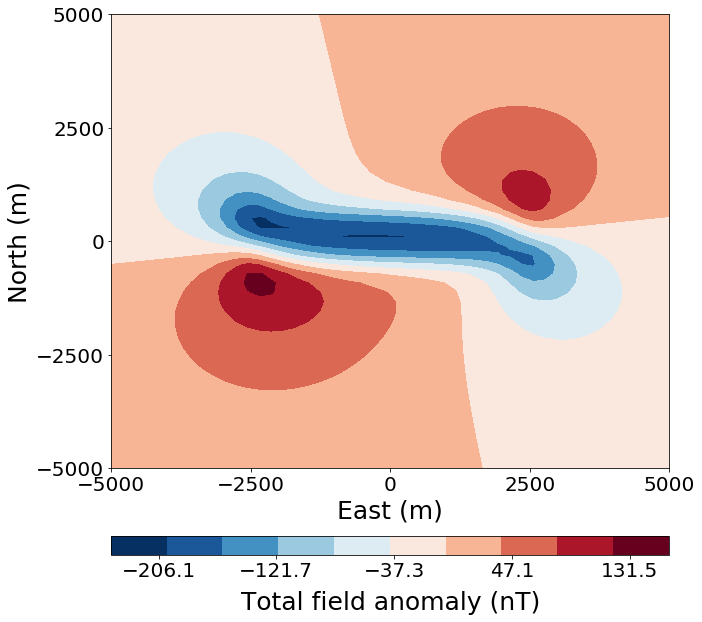

In [304]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape),  10, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 12, fmt = '%1.0f', manual = [(-2550., -2500.), (2500., -2500.), (2500., 3500.), (3000., -2000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape), 
                10, vmin = tfmin, vmax = tfmax, cmap = pyplot.cm.RdBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(tfmin, tfmax, 5))
cb.set_clim(tfmin, tfmax)
cb.set_label('Total field anomaly (nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.legend(loc = 'upper left', fontsize = 'x-large')
#pyplot.savefig('figs/totalfield-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/totalfield-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)

pyplot.show()

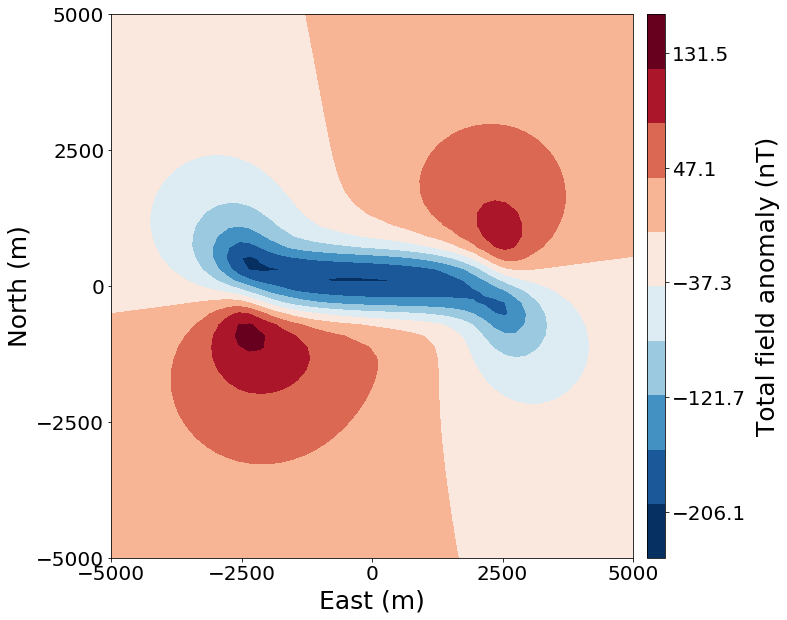

In [305]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape),  10, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 12, fmt = '%1.0f', manual = [(-2550., -2500.), (2500., -2500.), (2500., 3500.), (3000., -2000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape), 
                10, vmin = tfmin, vmax = tfmax, cmap = pyplot.cm.RdBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(tfmin, tfmax, 5))
cb.set_clim(tfmin, tfmax)
cb.set_label('Total field anomaly (nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.legend(loc = 'upper left', fontsize = 'x-large')
#pyplot.savefig('figs/totalfield-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/totalfield-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)

pyplot.show()

In [16]:
# Reshaping the total field data for using RTP in FOurier domain
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dobs = tf.reshape(shape)

In [17]:
# Importing the classical equivalent layer module
from codes import equivalentlayer

In [18]:
# Define the value of the equivalent layer
areal = area
shapel = (15, 15)
level = 1500.

In [19]:
# Building the equivalent layer
mylayer = equivalentlayer.layer(areal, shapel, level)

In [20]:
# Allocate the data values
mydata = [xo, yo, zo, tf]

In [21]:
# Calculate the predicted data
vec, fitted = equivalentlayer.fit_layer_mag(mydata, shape, mylayer, shapel, 0.0001, incf, decf, incs, decs)

In [22]:
# Import the scipy normalization
from scipy.stats import norm

In [23]:
# Calculated the residual and perfform a statiscal study
residuo = tf - fitted
res_mu = numpy.mean(residuo)
res_sigma = numpy.std(residuo)

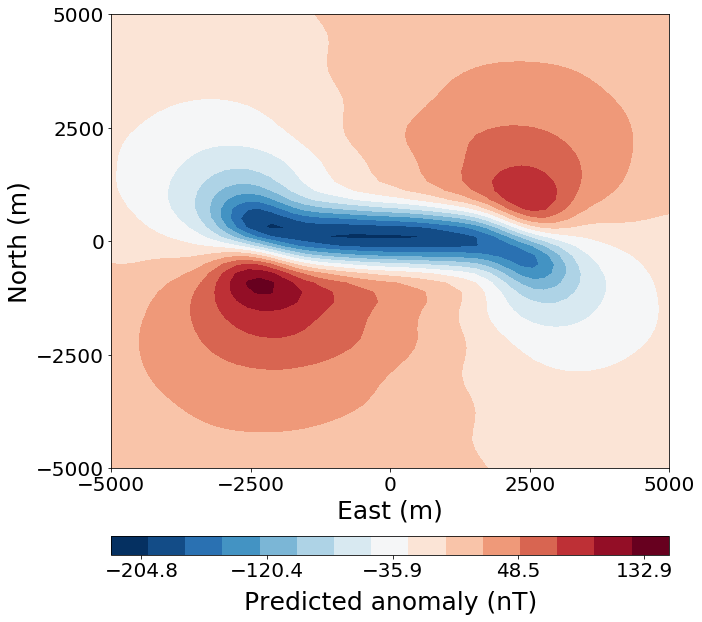

In [306]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), fitted.reshape(shape), 
#                10, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 12, fmt = '%1.0f', 
#                   manual = [(-2550., -2500.), (2500., -2500.), (2500., 3500.), (3000., -2000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), fitted.reshape(shape), 
                15, vmin = fitted.min(), vmax = fitted.max(), cmap = pyplot.cm.RdBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(fitted.min(), fitted.max(), 5))
cb.set_clim(fitted.min(), fitted.max())
cb.set_label('Predicted anomaly (nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.savefig('figs/fitted-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/fitted-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

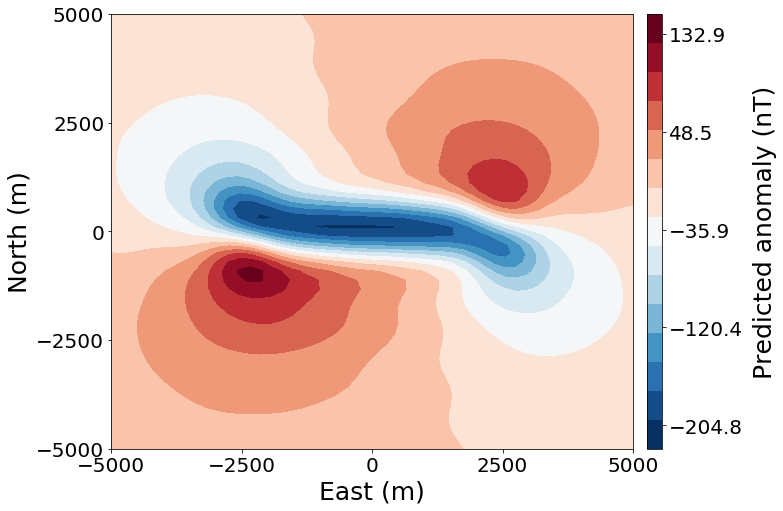

In [308]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), fitted.reshape(shape), 
#                10, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 12, fmt = '%1.0f', 
#                   manual = [(-2550., -2500.), (2500., -2500.), (2500., 3500.), (3000., -2000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), fitted.reshape(shape), 
                15, vmin = fitted.min(), vmax = fitted.max(), cmap = pyplot.cm.RdBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(fitted.min(), fitted.max(), 5))
cb.set_clim(fitted.min(), fitted.max())
cb.set_label('Predicted anomaly (nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.savefig('figs/fitted-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/fitted-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

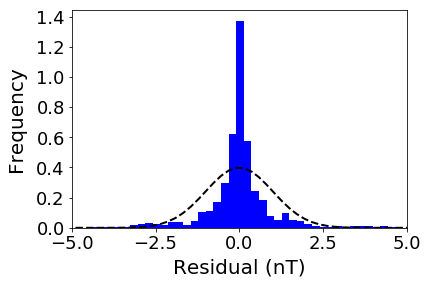

In [249]:
# Plotting the histogram of residual
s = (residuo - res_mu) / res_sigma
s = numpy.ravel(s)
nbins = int(numpy.max(s) - numpy.min(s))
n, bins, patches = pyplot.hist(s, 50, normed = True, facecolor = 'blue', alpha = 1.)
y_hist = norm.pdf(bins, numpy.mean(s), numpy.std(s))
pyplot.plot(bins, y_hist, 'k--', linewidth = 2)
#pyplot.text(3.5,0.25, '$\mu$=%0.5f' % (res_mu), horizontalalignment = 'center', fontsize = 12)
#pyplot.text(3.5,0.3, '$\sigma$=%0.5f' % (res_sigma), horizontalalignment = 'center', fontsize = 12)
pyplot.xlabel('Residual (nT)' , fontsize = 20, labelpad = 5)
pyplot.ylabel('Frequency', fontsize = 20, labelpad = 10)
pyplot.xlim(-5,5)
pyplot.xticks(numpy.arange(-5., 5 + 2.5, 2.5), fontsize = 18)
pyplot.yticks(fontsize = 18)
#pyplot.savefig('figs/histogram-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/histogram-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

# (1) Conventional cross-correlation between total gradient and vertical gradient of the reduced to pole data (Dannemiller and Li, 2006)

In [283]:
# Define the search area for correlation
inclination = numpy.linspace(-90., 90., 91)
declination = numpy.linspace(-90., 90., 91)
dec, inc = numpy.meshgrid(declination, inclination)

In [284]:
# Create the empty vector --> WND means wavenumber domain
res_wnd = numpy.zeros_like(dec)

In [285]:
# Import the module of filtering potential field data
from codes import filtering, derivative

In [286]:
# Compute the cross-correlation with RTP data calculated only in Fourier domain
ii = time.time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i == 0. or d == 0.:
            rtp = filtering.reduction(xobs, yobs, dobs, incf, decf, i + 0.25, d + 0.25)
            res_wnd[k1, k2] = statistical.cccoef(derivative.totalgrad(xobs, yobs, rtp),
                                              derivative.zderiv(xobs, yobs, rtp))
        else:
            rtp = filtering.reduction(xobs, yobs, dobs, incf, decf, i, d)
            res_wnd[k1, k2] = statistical.cccoef(derivative.totalgrad(xobs, yobs, rtp), 
                                              derivative.zderiv(xobs, yobs, rtp))
ff = time.time()
print 'Calculation process (in seconds): %.3f' % (ff-ii)

Calculation process (in seconds): 28.803


In [287]:
# Analyzes the cross-correlation values
_ = statistical.analysis(res_wnd, 'no unit')

Minimum:    -0.4436 no unit
Maximum:    0.6979 no unit
Mean value: 0.2260 no unit
Variation:  1.1415 no unit


In [288]:
# Finding the [i,j] element of maximum coefficient
im, jm = numpy.where(res_wnd == res_wnd.max())
incm = float(inc[im, jm])
decm = float(dec[im, jm])
print '(I,D) maximo:', incm, decm

(I,D) maximo: 0.0 68.0


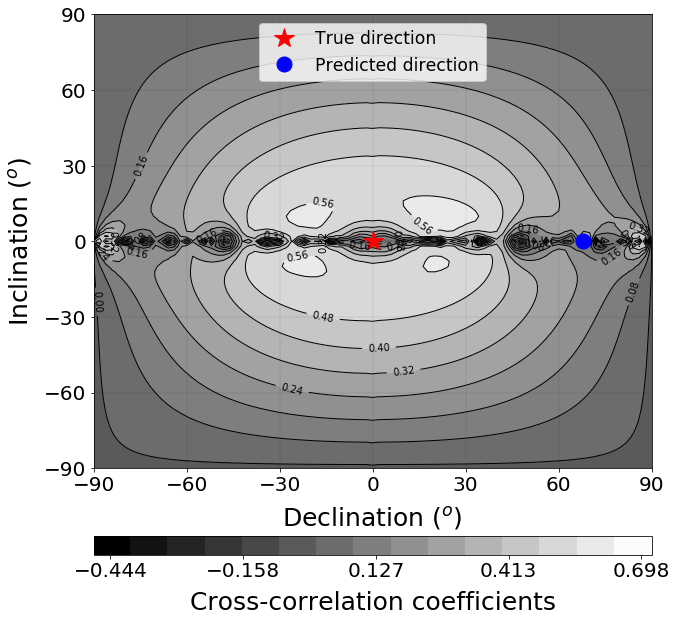

In [290]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_wnd, 15, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 10, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_wnd, 15, vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(res_wnd.min(), res_wnd.max(), 5))
cb.set_clim(res_wnd.min(), res_wnd.max())
cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/ccfd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccfd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

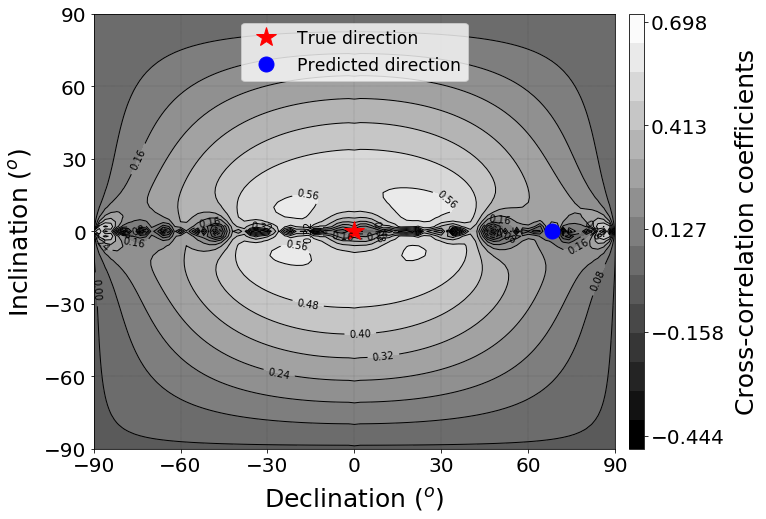

In [293]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,8))
ccfd = pyplot.contour(dec, inc, res_wnd, 15, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 10, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_wnd, 15, vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(res_wnd.min(), res_wnd.max(), 5))
cb.set_clim(res_wnd.min(), res_wnd.max())
cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/ccfd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccfd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

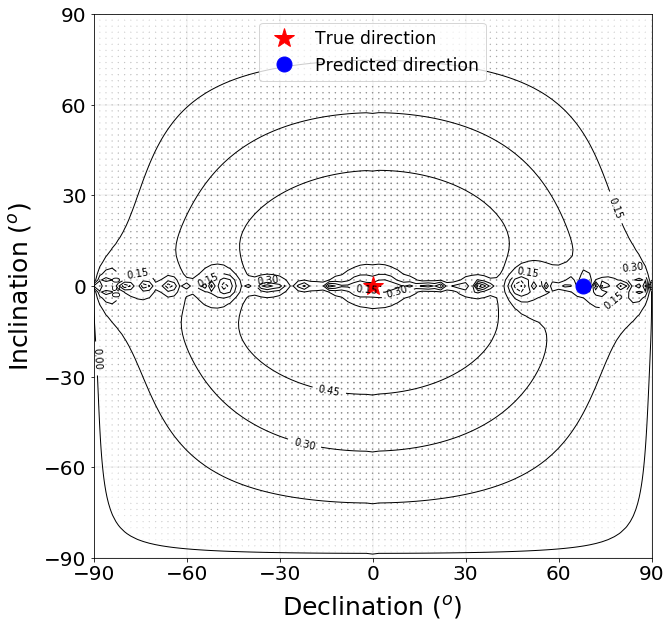

In [294]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_wnd, 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 10, fmt = '%1.2f')

csfd = pyplot.scatter(dec, inc, s = res_wnd, c = 'gray', vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/ccfd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccfd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [295]:
# Test the encountered direction by applying the reduction to pole
rtpfd = filtering.reduction(xobs, yobs, dobs, incf, decf, incm, decm)

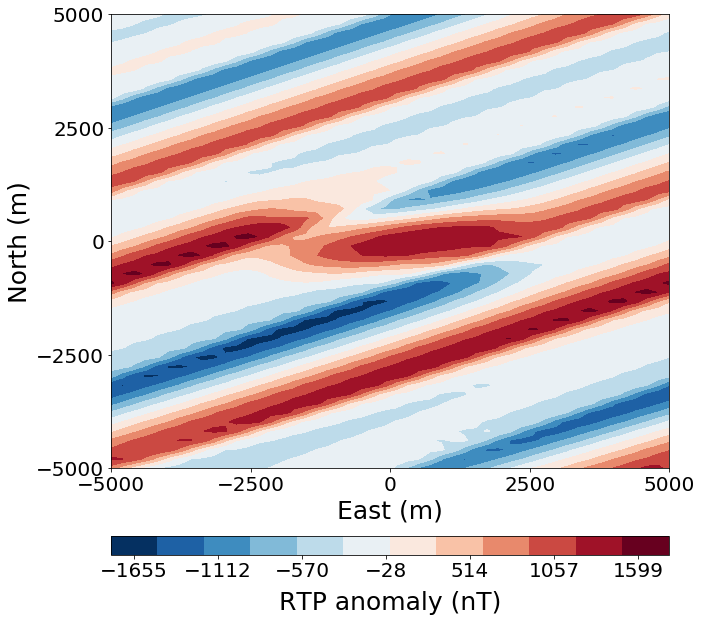

In [296]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), rtpfd, 
#                15, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 10, fmt = '%1.0f', 
#                   manual = [(-500., 2500.), (0., 0.), (500., 2000.), (3000., -1000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtpfd, 
                10, vmin = rtpfd.min(), vmax = rtpfd.max(), cmap = pyplot.cm.RdBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(rtpfd.min(), rtpfd.max(), 7))
cb.set_clim(rtpfd.min(), rtpfd.max())
cb.set_label('RTP anomaly (nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.savefig('figs/rtpfd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/rtpfd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

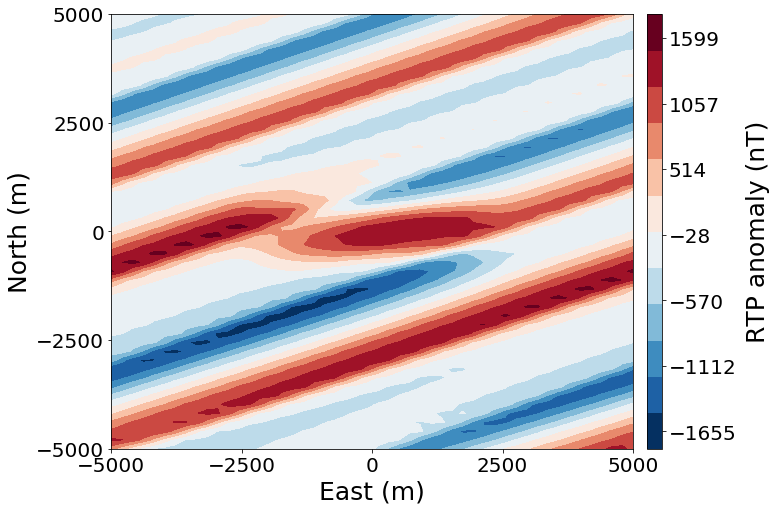

In [297]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), rtpfd, 
#                15, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 10, fmt = '%1.0f', 
#                   manual = [(-500., 2500.), (0., 0.), (500., 2000.), (3000., -1000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtpfd, 
                10, vmin = rtpfd.min(), vmax = rtpfd.max(), cmap = pyplot.cm.RdBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(rtpfd.min(), rtpfd.max(), 7))
cb.set_clim(rtpfd.min(), rtpfd.max())
cb.set_label('RTP anomaly (nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.savefig('figs/rtpfd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/rtpfd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

# (2) Multidomain cross-correlation between total gradient and vertical gradient of the reduced to pole data

In [298]:
# Define the search area for multidomain correlation
inclination = numpy.linspace(-90., 90., 13)
declination = numpy.linspace(-90., 90., 13)
dec, inc = numpy.meshgrid(declination, inclination)

In [299]:
# Create the empty vector --> SD means space domain
res_sd = numpy.zeros_like(dec)

In [301]:
# Compute the cross-correlation with RTP data calculated only in Fourier domain
ii = time.time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = equivalentlayer.rtp_layer(mydata, shape, mylayer, shapel, 0.0001, incf, decf, i, d)
            res_sd[k1, k2] = statistical.cccoef(derivative.totalgrad(xobs, yobs, rtp.reshape(shape)),
                                                derivative.zderiv(xobs, yobs, rtp.reshape(shape)))
        else:
            rtp = filtering.reduction(xobs, yobs, dobs, incf, decf, i, d)
            res_sd[k1, k2] = statistical.cccoef(derivative.totalgrad(xobs, yobs, rtp), 
                                                derivative.zderiv(xobs, yobs, rtp))
ff = time.time()
print 'Calculation process (in seconds): %.3f' % (ff-ii)

Calculation process (in seconds): 220.637


In [302]:
# Analyzes the cross-correlation values
_ = statistical.analysis(res_sd, 'no unit')

Minimum:    -0.1483 no unit
Maximum:    0.6986 no unit
Mean value: 0.1442 no unit
Variation:  0.8469 no unit


In [303]:
# Finding the [i,j] element of maximum coefficient
im, jm = numpy.where(res_sd == res_sd.max())
incm = float(inc[im, jm])
decm = float(dec[im, jm])
print '(I,D) maximo:', incm, decm

(I,D) maximo: 0.0 0.0


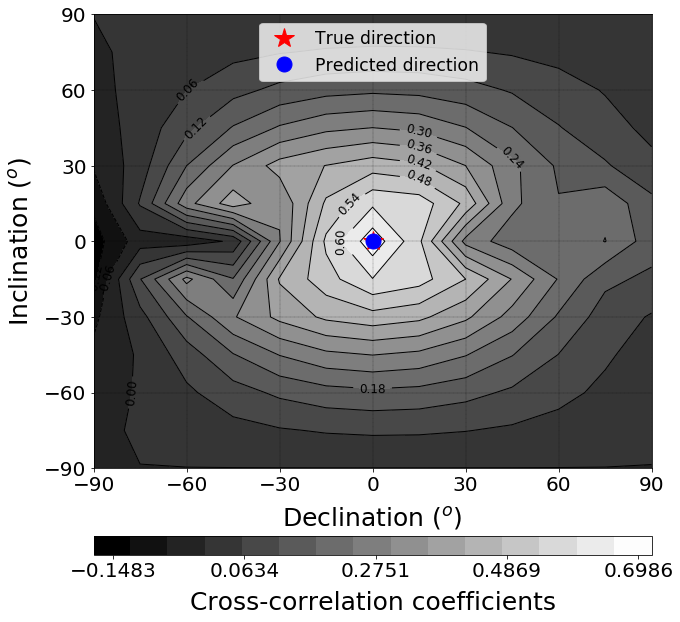

In [309]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_sd, 15, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_sd, 15, vmin = res_sd.min(), vmax = res_sd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(res_sd.min(), res_sd.max(), 5))
cb.set_clim(res_sd.min(), res_sd.max())
cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

#pyplot.savefig('figs/ccsd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccsd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

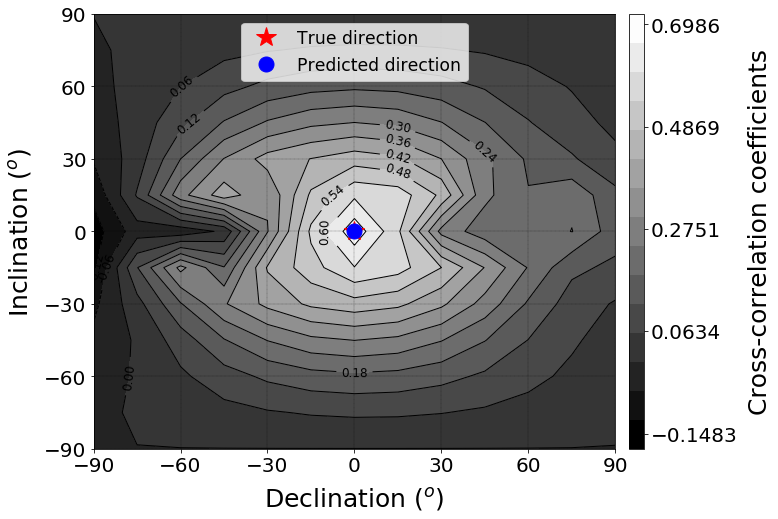

In [310]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,8))
ccfd = pyplot.contour(dec, inc, res_sd, 15, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_sd, 15, vmin = res_sd.min(), vmax = res_sd.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(res_sd.min(), res_sd.max(), 5))
cb.set_clim(res_sd.min(), res_sd.max())
cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

#pyplot.savefig('figs/ccsd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccsd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [311]:
# We have to interpolate the data just in order to make it smoother
areai = (-90., 90., -90., 90)
shapei = (181, 181)
inci, deci = grids.regular_grid(areai, shapei)

In [312]:
# Interpolated
datai = scipy.interpolate.griddata((inc.reshape(inc.size), dec.reshape(dec.size)), 
                 res_sd.reshape(res_sd.size), (inci, deci), method = 'cubic')

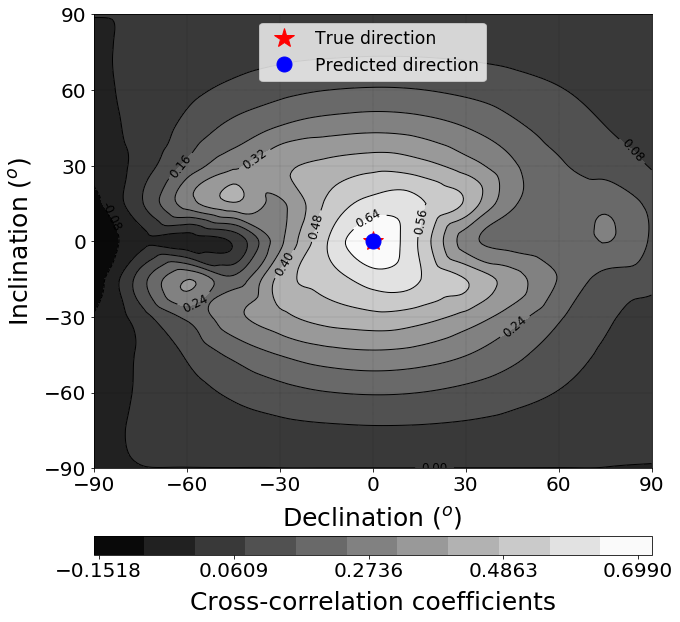

In [313]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/ccsd-final-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccsd-final-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

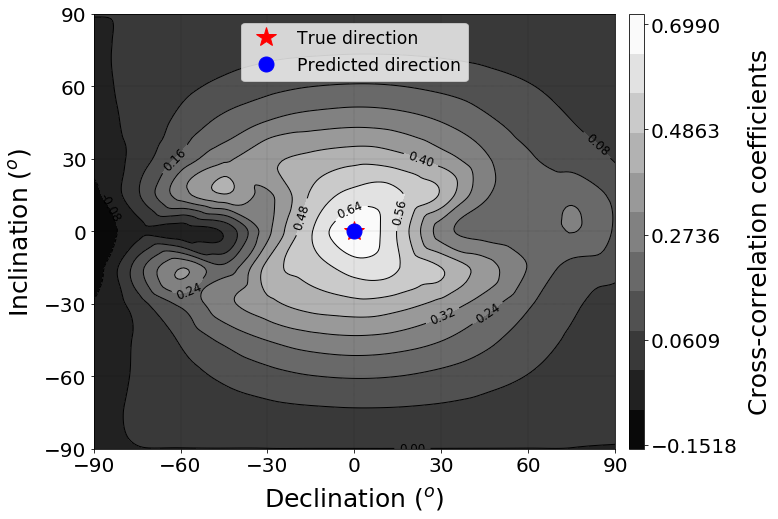

In [314]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10, 8))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/ccsd-final-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccsd-final-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

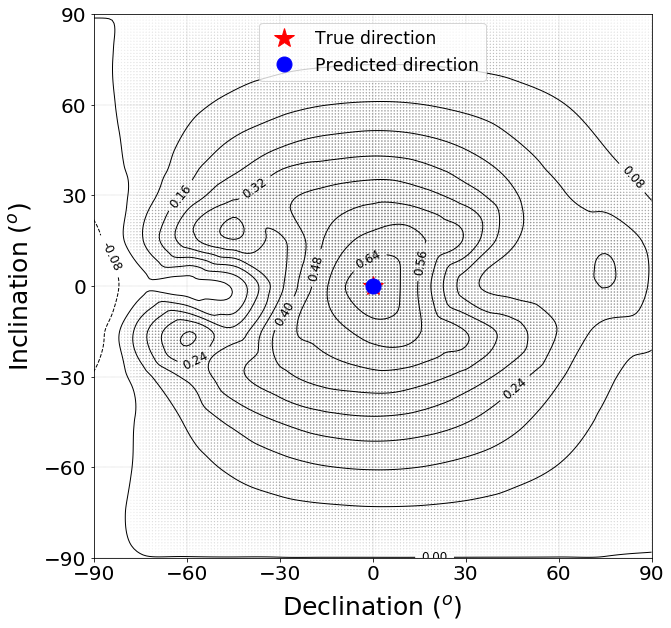

In [316]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10, 10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.scatter(deci.reshape(shapei), inci.reshape(shapei), s = datai.reshape(shapei), c = 'gray', vmin = datai.min(), vmax = datai.max())
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/ccsd-final-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccsd-final-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [317]:
# Test the encountered direction by applying the reduction to pole
rtpsd = equivalentlayer.rtp_layer(mydata, shape, mylayer, shapel, 0.0001, incf, decf, incm, decm)

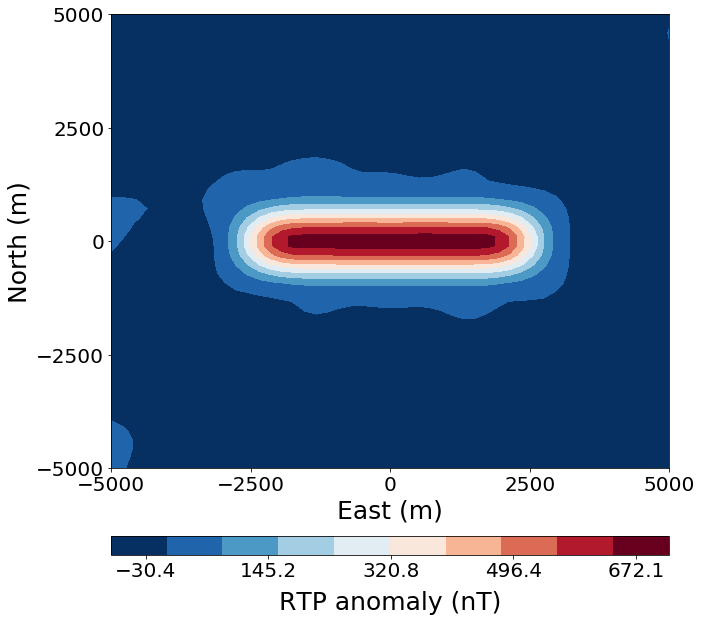

In [325]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), rtpsd.reshape(shape), 
#                15, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 10, fmt = '%1.0f', 
#                   manual = [(-500., 2500.), (0., 0.), (500., 2000.), (3000., -1000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtpsd.reshape(shape), 
                10, vmin = rtpsd.min(), vmax = rtpsd.max(), cmap = pyplot.cm.RdBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(rtpsd.min(), rtpsd.max(), 5))
cb.set_clim(rtpsd.min(), rtpsd.max())
cb.set_label('RTP anomaly (nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.savefig('figs/rtpsd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/rtpsd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()

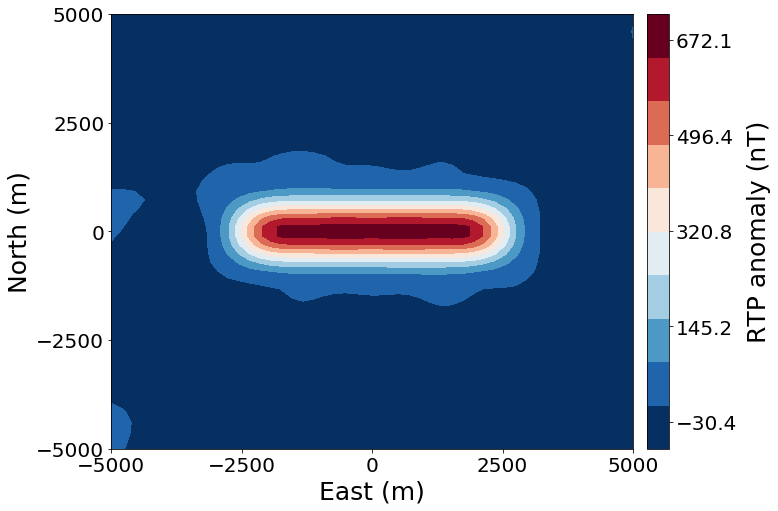

In [323]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), rtpsd.reshape(shape), 
#                15, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 10, fmt = '%1.0f', 
#                   manual = [(-500., 2500.), (0., 0.), (500., 2000.), (3000., -1000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtpsd.reshape(shape), 
                10, vmin = rtpsd.min(), vmax = rtpsd.max(), cmap = pyplot.cm.RdBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 20, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(rtpsd.min(), rtpsd.max(), 5))
cb.set_clim(rtpsd.min(), rtpsd.max())
cb.set_label('RTP anomaly (nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.savefig('figs/rtpsd-r1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/rtpsd-r1.pdf', dpi = 600, bbox_inches = 'tight', transparent = True)
pyplot.show()